In [192]:
import numpy as np
from sklearn.model_selection import train_test_split 

# Digit classification with K nearest neighbors

Data is loaded, including some corrupted images so one can play around with visualization

In [193]:
data = np.loadtxt(fname="MNIST-5-6-Subset.txt")
five = np.reshape(data[:784], (28,28)).swapaxes(0,1)

X = data.reshape((1877, 28, 28)).swapaxes(1,2)
Y = np.loadtxt(fname="MNIST-5-6-Subset-Labels.txt")

data_heavy = np.loadtxt(fname="MNIST-5-6-Subset-Heavy-Corruption.txt")
five_h_corrupted = np.reshape(data_heavy[784:(784 * 2)], (28,28))

data_light = np.loadtxt(fname="MNIST-5-6-Subset-Light-Corruption.txt")
five_l_corrupted = np.reshape(data_light[784:(784 * 2)], (28,28))

data_moderate = np.loadtxt(fname="MNIST-5-6-Subset-Moderate-Corruption.txt")
five_m_corrupted = np.reshape(data_moderate[784:(784 * 2)], (28,28))

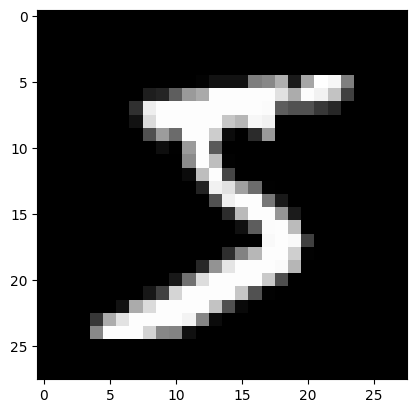

In [194]:
from matplotlib import pyplot as plt
import matplotlib.colors as cm
test = np.reshape(data[(784*110):(784*111)], (28,28)).swapaxes(0,1)
plt.imshow(five, 'gray', cm.NoNorm())
plt.show()

The data for task 2.1 is reshapen to the correct size.
Each row in X_train, X_test represent a digit of 784 elements/pixels. 
This is convenient for np but one must remember to transpose before doing matrix operations

In [195]:
X = data.reshape(1877, 784)
X_train, X_val = X[:100], X[100:]
Y_train, Y_val = Y[:100], Y[100:]

print(X[0].shape)
print(X_train.shape)
print(Y_train.shape[0:])
print(X_val.shape)
print(Y_val.shape[0:])

(784,)
(100, 784)
(100,)
(1777, 784)
(1777,)


kNN classifies 1 image by comparison with all images in the training data.
It calculates (x1 - x2).T(x1 - x2) for all training points (x1) and get a 
list of the euclidean distances. The list is sorted with respect to the 50 most resembeling images and two lists of indexes and labels of the images are created. The label list "_50_NN_labels" tells us what each neighboring label predicts whereas "predicted_labels" tells us what label we'd predict taking into account an increacing amount of neighbours predictions.
Finally, correct_predictions is returned: an array of 0's (correct) and 1's (wrong) indicating whether the precion was correct with a given k neighbors. 

In [196]:
def most_frequent(List):
    return max(set(List), key = List.count)


def kNN(X_train, X_val, Y_train, Y_val):
    """ 
        X_train, Y_train:   50 training images, 50 corresponding training labels
        X_val, Y_val:       1 validation image, 1 corresponding validation label
    """

    test_image = np.reshape(X_val, (784, 1))

    Xm = np.tile(test_image, (1, 100))              # 100 cols of 784p digits
    dist_matrix_transposed = (X_train.T - Xm).T     # (x1 - x2).T   100 x 784
    dist_matrix = X_train.T - Xm                    # (x1 - x2)     784 x 100
    dotted_matrices = np.dot(dist_matrix_transposed, dist_matrix)
    euc_dists = np.diag(dotted_matrices)

    _50_NN_indexes = np.argsort(euc_dists[:50])
    _50_NN_labels = Y_train[_50_NN_indexes]
    predicted_labels = [most_frequent(list(_50_NN_labels[:i+1])) for i in range(len(_50_NN_labels))]
    print(predicted_labels)
    # 0 means the label was pred correctly becasue predication - actual label = 0
    predictions = predicted_labels - Y_val
    print(predictions)
    correct_predictions = [0 if elm == 0 else 1 for elm in predictions]
    
    return correct_predictions


In [197]:
print(Y_val[11])

5.0


In [198]:
test = np.asarray(kNN(X_train, X_val[11], Y_train, Y_val[11]))
print(test)

[6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 5.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0]
[1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]


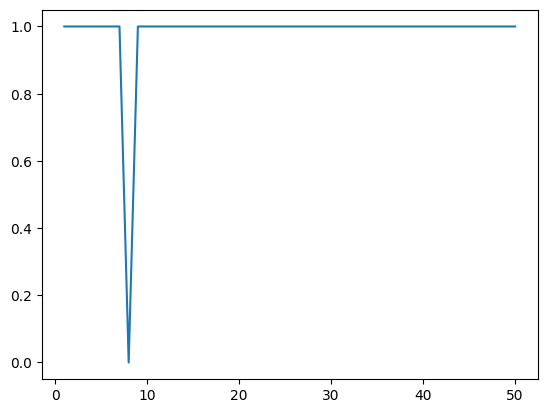

In [199]:
k = np.arange(start=1, stop=51, step=1)
plt.plot(k, test)
plt.show()

n_error is a sort of main function that calls kNN in the desired interval of n and i and calculates the the error as a function of k.

In [200]:
def create_validation_idx(n, i):
    start = i * n + 1
    end = (i + 1) * n
    validation_set = np.arange(start=start, stop= end + 1, step=1)
    return validation_set


def n_error(n, i):
    n_error = np.zeros(50)
    validation_idx = create_validation_idx(n, i)
    print(validation_idx)
    for idx in validation_idx:
        correct_predictions = np.array(kNN(X_train, X_val[idx], Y_train, Y_val[idx]))
        #print(correct_predictions)
        n_error += correct_predictions
        
    return n_error / len(validation_idx)


def n_error_corrupted(n, i, X_train, X_val, Y_train, Y_val):
    n_error = np.zeros(50)
    validation_idx = create_validation_idx(n, i)
    for idx in validation_idx:
        correct_predictions = np.array(kNN(X_train, X_val[idx], Y_train, Y_val[idx]))
        n_error += correct_predictions
        
    return n_error / len(validation_idx)


## Plots

[11 12 13 14 15 16 17 18 19 20]
[6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 5.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0]
[1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]
[6.0, 5.0, 5.0, 5.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 5.0, 6.0, 6.0, 6.0, 6.0, 6.0, 5.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 5.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0]
[ 0. -1. -1. -1.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0. -1.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.

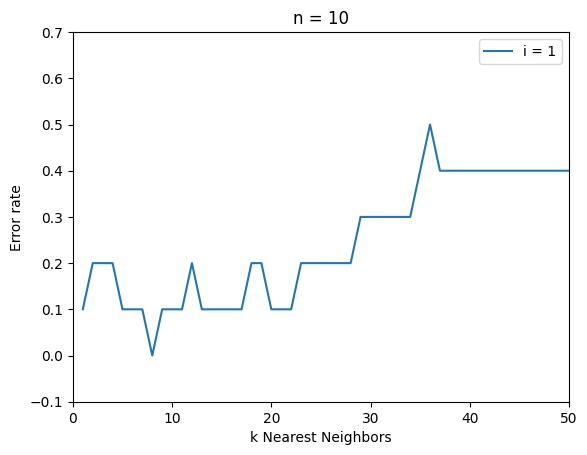

In [201]:
k = np.arange(start=1, stop=51, step=1)
n10_i1 = n_error(10, 1)
# n10_i2 = n_error(10, 2)
# n10_i3 = n_error(10, 3)
# n10_i4 = n_error(10, 4)
# n10_i5 = n_error(10, 5)
print(np.asarray(n10_i1))

plt.plot(k, n10_i1, label="i = 1")
# plt.plot(k, n10_i2, label="i = 2")
# plt.plot(k, n10_i3, label="i = 3")
# plt.plot(k, n10_i4, label="i = 4")
# plt.plot(k, n10_i5, label="i = 5")

plt.legend()
plt.title("n = 10")
plt.xlabel("k Nearest Neighbors")
plt.ylabel("Error rate")
plt.xlim([0, 50])
plt.ylim([-0.1, 0.7])
plt.show()

[21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40]
[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 6.0, 5.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0]
[0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]
[6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
[6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.

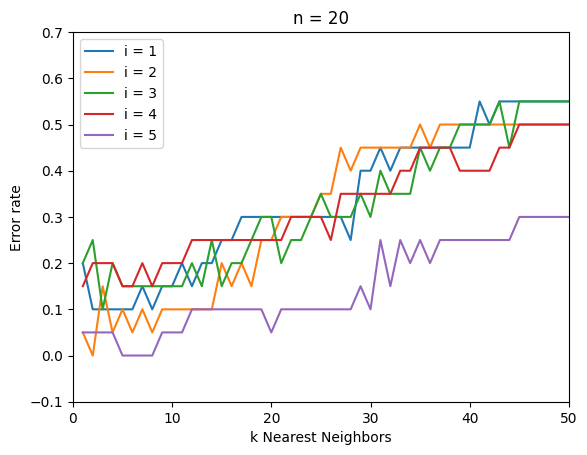

In [202]:
n20_i1 = n_error(20, 1)
n20_i2 = n_error(20, 2)
n20_i3 = n_error(20, 3)
n20_i4 = n_error(20, 4)
n20_i5 = n_error(20, 5)

plt.plot(k, n20_i1, label="i = 1")
plt.plot(k, n20_i2, label="i = 2")
plt.plot(k, n20_i3, label="i = 3")
plt.plot(k, n20_i4, label="i = 4")
plt.plot(k, n20_i5, label="i = 5")

plt.legend()
plt.title("n = 20")
plt.xlabel("k Nearest Neighbors")
plt.ylabel("Error rate")
plt.xlim([0, 50])
plt.ylim([-0.1, 0.7])
plt.show()

[41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80]
[6.0, 5.0, 6.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 6.0, 5.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0]
[1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]
[6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
[6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6

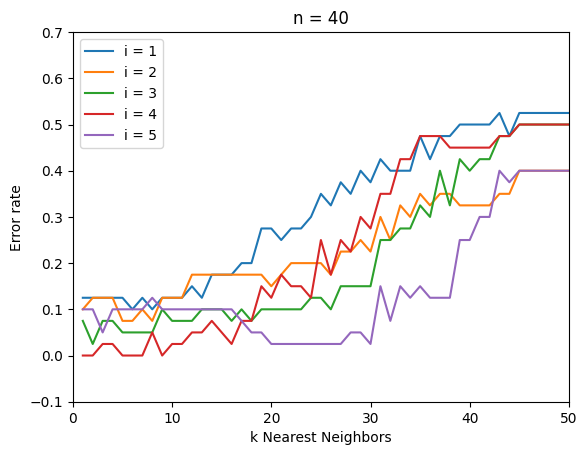

In [203]:
n40_i1 = n_error(40, 1)
n40_i2 = n_error(40, 2)
n40_i3 = n_error(40, 3)
n40_i4 = n_error(40, 4)
n40_i5 = n_error(40, 5)

plt.plot(k, n40_i1, label="i = 1")
plt.plot(k, n40_i2, label="i = 2")
plt.plot(k, n40_i3, label="i = 3")
plt.plot(k, n40_i4, label="i = 4")
plt.plot(k, n40_i5, label="i = 5")

plt.legend()
plt.title("n = 40")
plt.xlabel("k Nearest Neighbors")
plt.ylabel("Error rate")
plt.xlim([0, 50])
plt.ylim([-0.1, 0.7])

plt.show()

In [204]:
n80_i1 = n_error(80, 1)
n80_i2 = n_error(80, 2)
n80_i3 = n_error(80, 3)
n80_i4 = n_error(80, 4)
n80_i5 = n_error(80, 5)

plt.plot(k, n80_i1, label="i = 1")
plt.plot(k, n80_i2, label="i = 2")
plt.plot(k, n80_i3, label="i = 3")
plt.plot(k, n80_i4, label="i = 4")
plt.plot(k, n80_i5, label="i = 5")

plt.legend()
plt.title("n = 80, No corruption")
plt.xlabel("k Nearest Neighbors")
plt.ylabel("Error rate")
plt.xlim([0, 50])
plt.ylim([-0.1, 0.7])

plt.show()

## Variances

In [ ]:
mean_n10 = n10_i1 * 1/5 + n10_i2 * 1/5 + n10_i3 * 1/5 + n10_i4 * 1/5
variance_i1 = (n10_i1 - mean_n10) ** 2 * 1/50
variance_i2 = (n10_i2 - mean_n10) ** 2 * 1/50
variance_i3 = (n10_i3 - mean_n10) ** 2 * 1/50
variance_i4 = (n10_i4 - mean_n10) ** 2 * 1/50
variance_i5 = (n10_i3 - mean_n10) ** 2 * 1/50
variance_n10 = variance_i1 + variance_i2 + variance_i3 + variance_i4 + variance_i5
print(variance_n10)

[0.0004  0.00044 0.0002  0.00044 0.0002  0.0002  0.00044 0.00028 0.00044
 0.00044 0.001   0.0006  0.001   0.001   0.0012  0.0012  0.00192 0.00176
 0.00112 0.00136 0.00112 0.00112 0.0008  0.0008  0.0008  0.0008  0.00112
 0.0014  0.0008  0.0008  0.00156 0.0008  0.00156 0.00156 0.00124 0.00124
 0.00124 0.00124 0.00124 0.00124 0.00224 0.00124 0.00224 0.00224 0.00224
 0.00224 0.00224 0.00224 0.00224 0.00224]


In [ ]:
mean_n20 = n20_i1 * 1/5 + n20_i2 * 1/5 + n20_i3 * 1/5 + n20_i4 * 1/5
variance_i1 = (n20_i1 - mean_n20) ** 2 * 1/50
variance_i2 = (n20_i2 - mean_n20) ** 2 * 1/50
variance_i3 = (n20_i3 - mean_n20) ** 2 * 1/50
variance_i4 = (n20_i4 - mean_n20) ** 2 * 1/50
variance_i5 = (n20_i3 - mean_n20) ** 2 * 1/50
variance_n20 = variance_i1 + variance_i2 + variance_i3 + variance_i4 + variance_i5
print(variance_n20)

[0.0005  0.00119 0.0002  0.00056 0.00015 0.00025 0.00019 0.00025 0.00019
 0.00019 0.00023 0.00042 0.00035 0.00059 0.00029 0.0003  0.00032 0.00049
 0.00042 0.00042 0.00036 0.00031 0.00031 0.00036 0.00055 0.00046 0.0007
 0.00062 0.00065 0.0007  0.00078 0.00065 0.00069 0.00069 0.00085 0.0007
 0.00085 0.00085 0.00116 0.00116 0.00124 0.00116 0.00137 0.00097 0.00127
 0.00127 0.00127 0.00127 0.00127 0.00127]


In [ ]:
mean_n40 = n40_i1 * 1/5 + n40_i2 * 1/5 + n40_i3 * 1/5 + n40_i4 * 1/5
variance_i1 = (n40_i1 - mean_n40) ** 2 * 1/50
variance_i2 = (n40_i2 - mean_n40) ** 2 * 1/50
variance_i3 = (n40_i3 - mean_n40) ** 2 * 1/50
variance_i4 = (n40_i4 - mean_n40) ** 2 * 1/50
variance_i5 = (n40_i3 - mean_n40) ** 2 * 1/50
variance_n40 = variance_i1 + variance_i2 + variance_i3 + variance_i4 + variance_i5
print(variance_n40)

[1.9750e-04 2.9250e-04 1.6250e-04 1.6250e-04 1.7500e-04 1.2000e-04
 2.0000e-04 5.0000e-05 2.5500e-04 1.6250e-04 1.6250e-04 2.5750e-04
 2.0500e-04 2.1500e-04 2.7500e-04 3.8250e-04 2.7500e-04 3.3250e-04
 4.5500e-04 4.6500e-04 3.5500e-04 4.8000e-04 4.8000e-04 5.3750e-04
 7.7750e-04 7.1500e-04 7.7500e-04 6.2500e-04 9.9000e-04 8.0500e-04
 6.9000e-04 6.5000e-04 6.9250e-04 7.1750e-04 9.1250e-04 8.7500e-04
 8.7500e-04 8.3750e-04 1.0475e-03 9.8000e-04 1.0475e-03 1.0475e-03
 1.2425e-03 1.1525e-03 1.1900e-03 1.1900e-03 1.1900e-03 1.1900e-03
 1.1900e-03 1.1900e-03]


In [ ]:
mean_n80 = n80_i1 * 1/5 + n80_i2 * 1/5 + n80_i3 * 1/5 + n80_i4 * 1/5
variance_i1 = (n80_i1 - mean_n80) ** 2 * 1/50
variance_i2 = (n80_i2 - mean_n80) ** 2 * 1/50
variance_i3 = (n80_i3 - mean_n80) ** 2 * 1/50
variance_i4 = (n80_i4 - mean_n80) ** 2 * 1/50
variance_i5 = (n80_i3 - mean_n80) ** 2 * 1/50
variance_n80 = variance_i1 + variance_i2 + variance_i3 + variance_i4 + variance_i5
print(variance_n80)

[4.31250e-05 2.00000e-05 5.93750e-05 4.75000e-05 1.93750e-05 3.06250e-05
 1.16875e-04 3.12500e-05 1.43750e-04 5.31250e-05 1.88125e-04 7.50000e-05
 1.80000e-04 1.21250e-04 2.68750e-04 2.00000e-04 5.50000e-04 4.60000e-04
 5.34375e-04 4.64375e-04 3.70625e-04 5.23750e-04 6.41250e-04 5.88125e-04
 4.56250e-04 5.21875e-04 3.63125e-04 3.65625e-04 4.62500e-04 4.66875e-04
 3.59375e-04 4.20625e-04 4.56250e-04 4.62500e-04 5.08750e-04 4.38750e-04
 6.52500e-04 5.43750e-04 6.75000e-04 5.78750e-04 7.09375e-04 6.55000e-04
 7.80625e-04 7.75625e-04 8.12500e-04 8.12500e-04 8.12500e-04 8.12500e-04
 8.12500e-04 8.12500e-04]


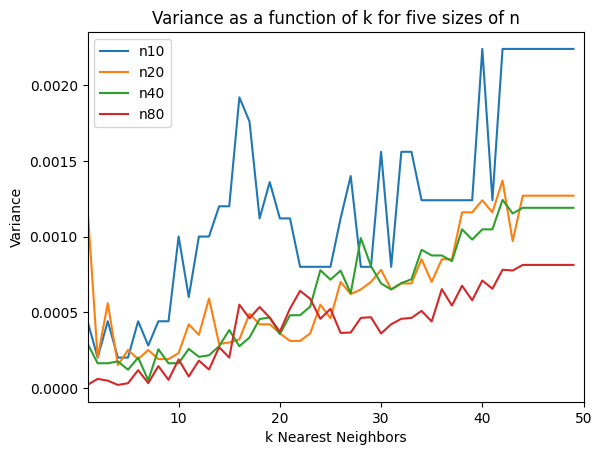

In [ ]:
plt.plot(variance_n10, label="n10")
plt.plot(variance_n20, label="n20")
plt.plot(variance_n40, label="n40")
plt.plot(variance_n80, label="n80")

plt.title("Variance as a function of k for five sizes of n")
plt.xlabel("k Nearest Neighbors")
plt.ylabel("Variance")
plt.xlim([1, 50])
plt.legend()

plt.show()

## Task 2.2

In [ ]:
# X_heavy = data_heavy.reshape((1877, 28, 28)).swapaxes(1,2)
# X_light = data_heavy.reshape((1877, 28, 28)).swapaxes(1,2)
# X_moderate = data_moderate.reshape((1877, 28, 28)).swapaxes(1,2)

X_heavy = data_heavy.reshape(1877, 784)
X_light = data_light.reshape(1877, 784)
X_moderate = data_moderate.reshape(1877, 784)

# each row in X_train, X_test represent a digit of 784 elements/pixels. 
# This is convenient for np but remember to transpose before doing matrix things
X_train_heavy, X_val_heavy = X_heavy[:100], X_heavy[100:]
X_train_light, X_val_light = X_light[:100], X_light[100:]
X_train_moderate, X_val_moderate = X_moderate[:100], X_moderate[100:]

Y_train, Y_val = Y[:100], Y[100:]

[ 0. -1.  0.  0.  0. -1. -1. -1. -1. -1. -1. -1. -1. -1.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]
[ 0. -1. -1. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[-1. -1. -1. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[-1. -1. -1. -1.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[-1. -1.  0. -1.  0.  0.  0.  

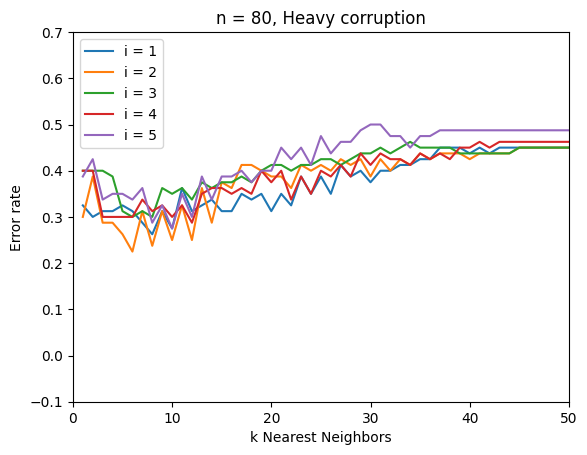

In [ ]:
heavy_i1_line = n_error_corrupted(80, 1, X_train_heavy, X_val_heavy, Y_train, Y_val)
heavy_i2_line = n_error_corrupted(80, 2, X_train_heavy, X_val_heavy, Y_train, Y_val)
heavy_i3_line = n_error_corrupted(80, 3, X_train_heavy, X_val_heavy, Y_train, Y_val)
heavy_i4_line = n_error_corrupted(80, 4, X_train_heavy, X_val_heavy, Y_train, Y_val)
heavy_i5_line = n_error_corrupted(80, 5, X_train_heavy, X_val_heavy, Y_train, Y_val)

plt.plot(k, heavy_i1_line, label="i = 1")
plt.plot(k, heavy_i2_line, label="i = 2")
plt.plot(k, heavy_i3_line, label="i = 3")
plt.plot(k, heavy_i4_line, label="i = 4")
plt.plot(k, heavy_i5_line, label="i = 5")

plt.legend()
plt.title("n = 80, Heavy corruption")
plt.xlabel("k Nearest Neighbors")
plt.ylabel("Error rate")
plt.xlim([0, 50])
plt.ylim([-0.1, 0.7])
plt.show()

[ 0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
[ 0. -1.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

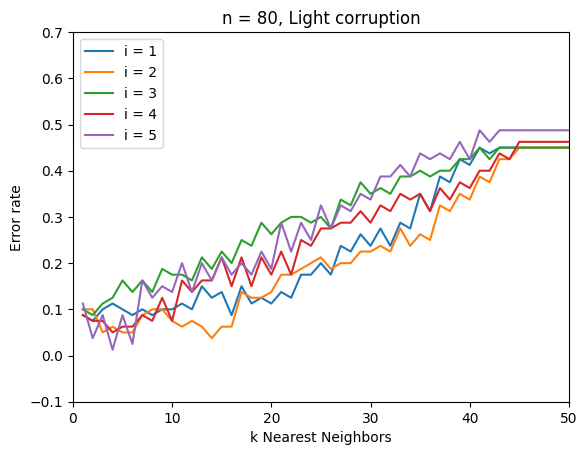

In [ ]:
light_i1_line = n_error_corrupted(80, 1, X_train_light, X_val_light, Y_train, Y_val)
light_i2_line = n_error_corrupted(80, 2, X_train_light, X_val_light, Y_train, Y_val)
light_i3_line = n_error_corrupted(80, 3, X_train_light, X_val_light, Y_train, Y_val)
light_i4_line = n_error_corrupted(80, 4, X_train_light, X_val_light, Y_train, Y_val)
light_i5_line = n_error_corrupted(80, 5, X_train_light, X_val_light, Y_train, Y_val)

plt.plot(k, light_i1_line, label="i = 1")
plt.plot(k, light_i2_line, label="i = 2")
plt.plot(k, light_i3_line, label="i = 3")
plt.plot(k, light_i4_line, label="i = 4")
plt.plot(k, light_i5_line, label="i = 5")

plt.legend()
plt.title("n = 80, Light corruption")
plt.xlabel("k Nearest Neighbors")
plt.ylabel("Error rate")
plt.xlim([0, 50])
plt.ylim([-0.1, 0.7])
plt.show()

[ 0.  0.  0.  0.  0.  0.  0. -1. -1. -1.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
[ 0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[-1. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 

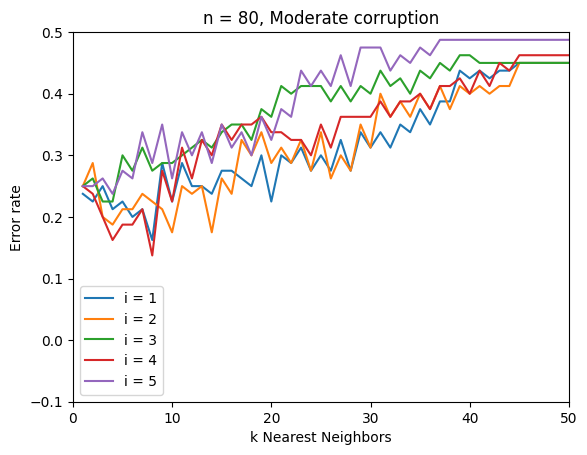

In [ ]:
moderate_i1_line = n_error_corrupted(80, 1, X_train_moderate, X_val_moderate, Y_train, Y_val)
moderate_i2_line = n_error_corrupted(80, 2, X_train_moderate, X_val_moderate, Y_train, Y_val)
moderate_i3_line = n_error_corrupted(80, 3, X_train_moderate, X_val_moderate, Y_train, Y_val)
moderate_i4_line = n_error_corrupted(80, 4, X_train_moderate, X_val_moderate, Y_train, Y_val)
moderate_i5_line = n_error_corrupted(80, 5, X_train_moderate, X_val_moderate, Y_train, Y_val)

plt.plot(k, moderate_i1_line, label="i = 1")
plt.plot(k, moderate_i2_line, label="i = 2")
plt.plot(k, moderate_i3_line, label="i = 3")
plt.plot(k, moderate_i4_line, label="i = 4")
plt.plot(k, moderate_i5_line, label="i = 5")

plt.legend()
plt.title("n = 80, Moderate corruption")
plt.xlabel("k Nearest Neighbors")
plt.ylabel("Error rate")
plt.xlim([0, 50])
plt.ylim([-0.1, 0.5])
plt.show()